In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from src.data_pipeline import (
    load_data,
    convert_timestamp,
    detect_outliers_zscore,
    impute_missing_median,
    save_clean_data
)

# Load cleaned datasets
benin = load_data("../data/cleaned/bennin.csv")
sierra = load_data("../data/cleaned/sierraleone-bumbuna_clean.csv")
togo = load_data("../data/cleaned/togo_cleann.csv")


# Add a column for country name
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WS_zscore,WSgust_zscore,Country,GHI_Zscore,DNI_Zscore,DHI_Zscore,ModA_Zscore,ModB_Zscore,WS_Zscore,WSgust_Zscore
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,1.322831,1.187312,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,1.322831,1.384442,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,1.135736,0.842334,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,1.198101,1.039464,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,1.260466,1.039464,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
metrics = ['GHI', 'DNI', 'DHI']

summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

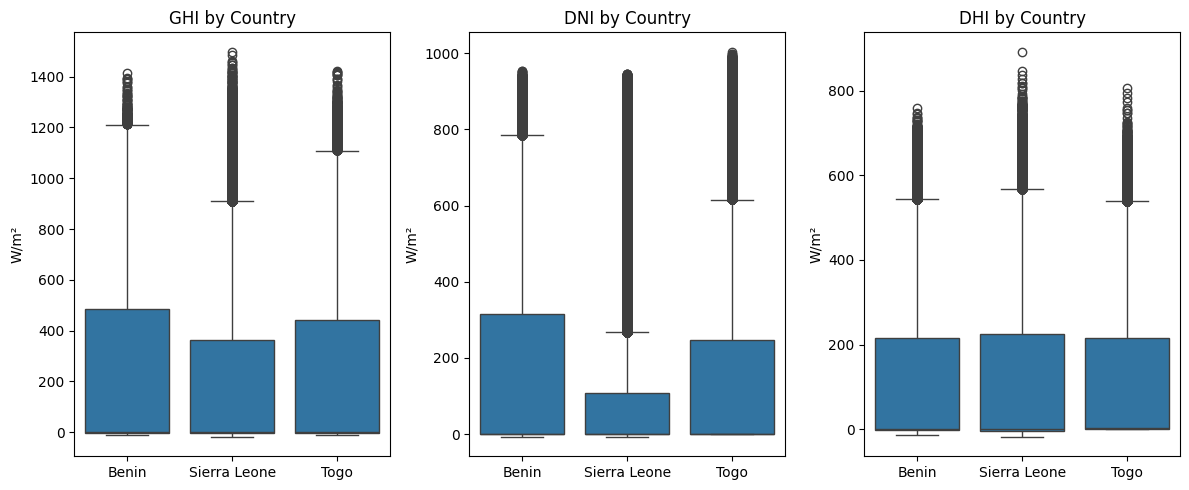

In [3]:
plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} by Country')
    plt.xlabel('')
    plt.ylabel('W/m²')
plt.tight_layout()
plt.show()

In [4]:
for metric in metrics:
    f_stat, p_value = stats.f_oneway(
        df_all[df_all['Country'] == 'Benin'][metric],
        df_all[df_all['Country'] == 'Sierra Leone'][metric],
        df_all[df_all['Country'] == 'Togo'][metric]
    )
    print(f"{metric}: F-stat={f_stat:.2f}, p-value={p_value:.5f}")

GHI: F-stat=2090.09, p-value=0.00000
DNI: F-stat=5940.05, p-value=0.00000
DHI: F-stat=39.56, p-value=0.00000


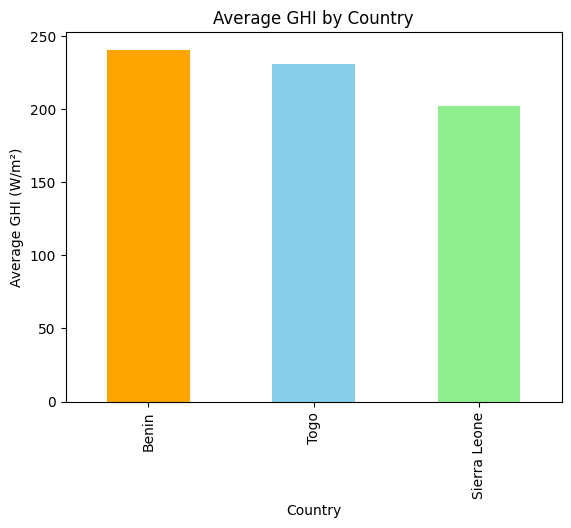

In [5]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color=['orange', 'skyblue', 'lightgreen'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()

In [6]:
summary.to_csv('../data/solar_comparison_summary.csv')